In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tqdm import tqdm
import sys
np.set_printoptions(threshold=sys.maxsize)

# Exercise 1

In [34]:
#Setting variables
beta = 1

#Integral functions
def qIntegral(z,J,J0,q,m):
  return np.exp(-z**2/2)/(np.cosh(beta*J*np.sqrt(q)*z + beta*J0*m)**2)

def mIntegral(z,J,J0,q,m):
  return np.exp(-z**2/2)*np.tanh(beta*J*np.sqrt(q)*z + beta*J0*m)

#Function that calculates q and m for given J and J0
def calcQM(J,J0):
  #Setting starting variables
  q = 1
  m = 1

  #Iterating until q and m are constant
  while True:
    q_new = 1 - integrate.quad(qIntegral,-np.inf,np.inf,args=(J,J0,q,m))[0]/(np.sqrt(2*np.pi)) #Calculating new q value
    m_new = integrate.quad(mIntegral,-np.inf,np.inf,args=(J,J0,q,m))[0]/(np.sqrt(2*np.pi)) #Calculating new m value

    #Breaking loop if difference between current and previous iteration is small enough
    if np.abs(q_new-q) < 1e-5 and np.abs(m_new-m) < 1e-5:
      break

    #Updating q and m
    q = q_new
    m = m_new

  return q,m

  0%|          | 0/40 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
100%|██████████| 40/40 [03:00<00:00,  4.51s/it]


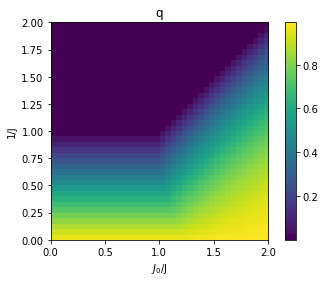

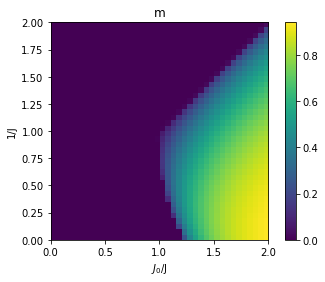

In [35]:
#Setting variables
x = np.arange(0.05,2.05,0.05)
y = np.arange(0.05,2.05,0.05)

q_vals = np.zeros((len(y),len(x)))
m_vals = np.zeros((len(y),len(x)))

#Calculating q and m for each value combination of x and y
for i in tqdm(range(len(x))):
  for j in range(len(y)):
    J = 1/y[j]
    J0 = x[i]/y[j]

    q_vals[j,i],m_vals[j,i] = calcQM(J,J0)

#Flipping axis for plot
q_vals = np.flip(q_vals,0)
m_vals = np.flip(m_vals,0)

#Plotting
c = plt.imshow(q_vals,extent=(0,2,0,2))
plt.colorbar(c)
plt.title('q')
plt.xlabel('$J_{0}$/J')
plt.ylabel('1/J')
plt.show()

c = plt.imshow(m_vals,extent=(0,2,0,2))
plt.colorbar(c)
plt.title('m')
plt.xlabel('$J_{0}$/J')
plt.ylabel('1/J')
plt.show()

# Exercise 2

In [36]:
#Integral function
def hIntegral(z,J,J0,q,m):
  return np.exp(-z**2/2)*(np.abs(beta*J*np.sqrt(q)*z + beta*J0*m) + np.log(1 + np.exp(-2*np.abs(beta*J*np.sqrt(q)*z + beta*J0*m))))

#Function that calculates H
def calcH(J,J0,q,m):
  return integrate.quad(hIntegral,-np.inf,np.inf,args=(J,J0,q,m))[0]/(np.sqrt(2*np.pi)) - beta**2/4*J**2*(q-1)**2 - beta*J0*m**2 - beta**2*J**2*q*(1-q)

100%|██████████| 40/40 [00:04<00:00,  8.17it/s]


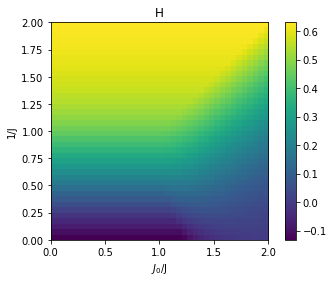

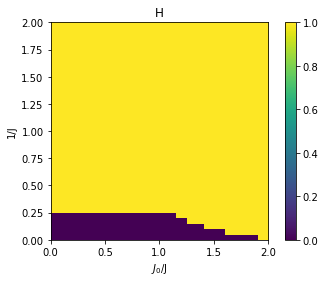

In [37]:
#Flipping back
q_vals = np.flip(q_vals,0)
m_vals = np.flip(m_vals,0)

#Defining array
h_vals = np.zeros((len(y),len(x)))
h_thresh = np.zeros((len(y),len(x)))

#Calculating H for each gridpoint
for i in tqdm(range(len(x))):
  for j in range(len(y)):
    J = 1/y[j]
    J0 = x[i]/y[j]
    q = q_vals[j,i]
    m = m_vals[j,i]

    h = calcH(J,J0,q,m)

    if h > 0:
      h_vals[j,i] = h
      h_thresh[j,i] = 1
    else:
      h_vals[j,i] = h
      h_thresh[j,i] = 0

#Flipping for plot
h_vals = np.flip(h_vals,0)
h_thresh = np.flip(h_thresh,0)

#Plotting
c = plt.imshow(h_vals,extent=(0,2,0,2))
plt.colorbar(c)
plt.title('H')
plt.xlabel('$J_{0}$/J')
plt.ylabel('1/J')
plt.show()

c = plt.imshow(h_thresh,extent=(0,2,0,2))
plt.colorbar(c)
plt.title('H')
plt.xlabel('$J_{0}$/J')
plt.ylabel('1/J')
plt.show()